In [5]:
import networkx as nx
from DoublePushout import DoublePushout

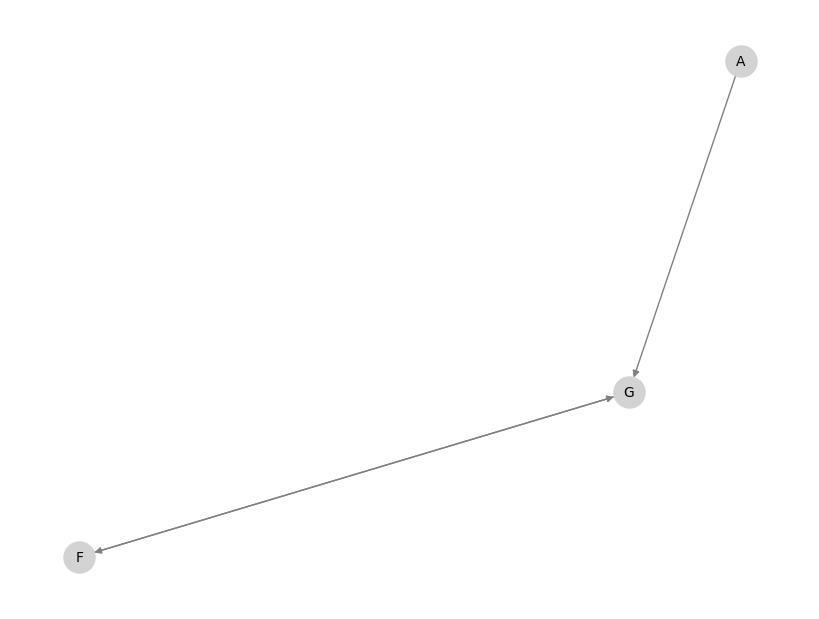

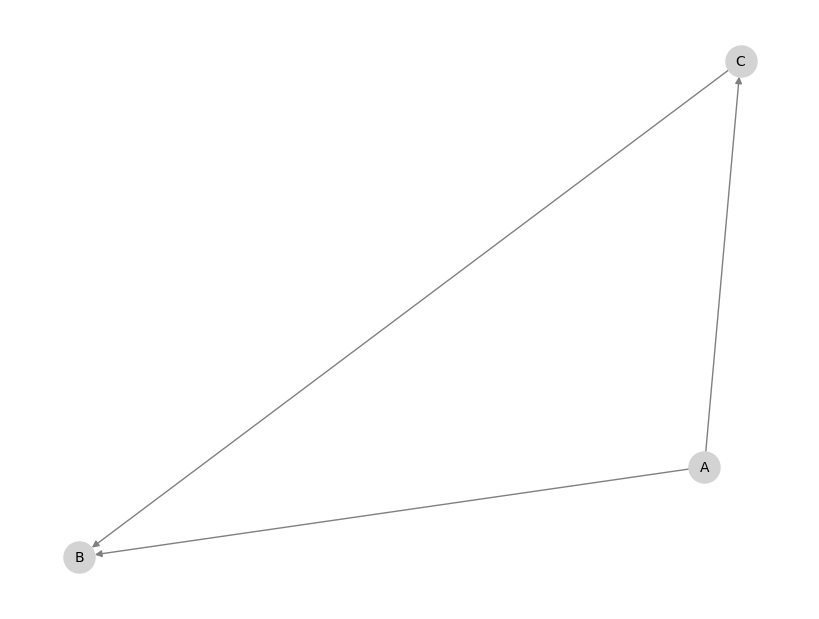

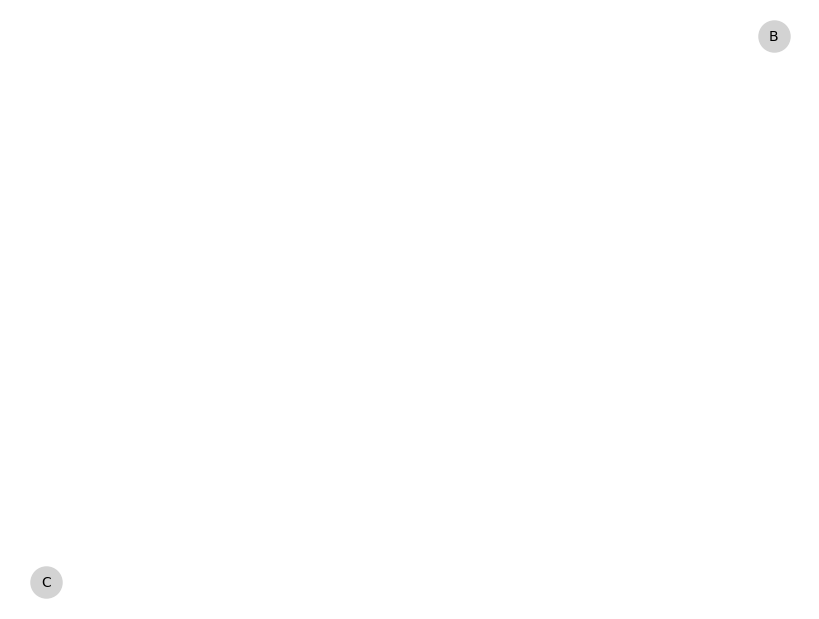

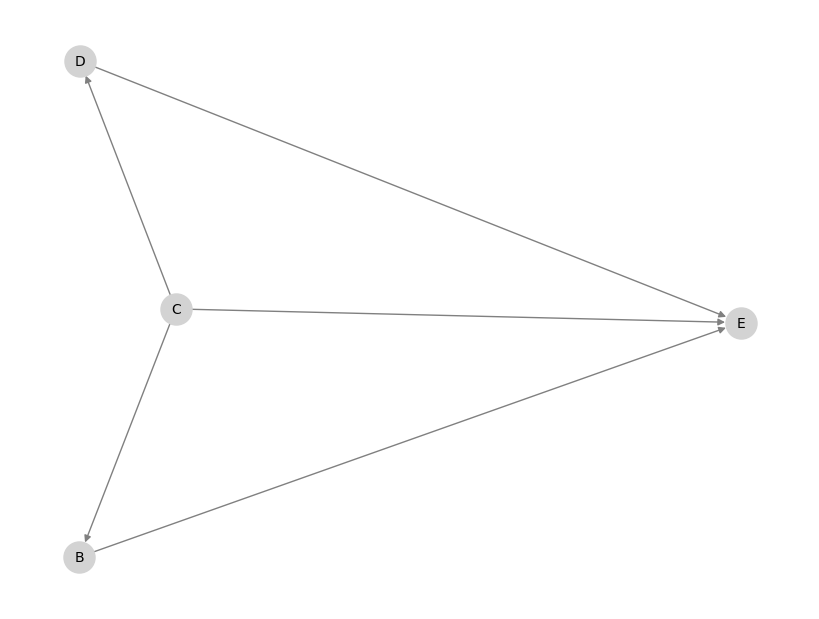

In [6]:
G = nx.MultiDiGraph()
G.add_edges_from([('A', 'G'), ('G', 'F'), ('F', 'G')])

L = nx.MultiDiGraph()
L.add_edges_from([('A', 'B'), ('A', 'C'), ('C', 'B')])

K = nx.MultiDiGraph()
K.add_nodes_from(['B', 'C'])

R = nx.MultiDiGraph()
R.add_edges_from([('C', 'B'), ('C', 'D'), ('C', 'E'), ('B', 'E'), ('D', 'E')])

dpo = DoublePushout(G, L, K, R)

dpo.define_morphism({'A': 'A', 'B': 'G', 'C': 'G'})

dpo._draw_graph(dpo.G)
dpo._draw_graph(dpo.L)
dpo._draw_graph(dpo.K)
dpo._draw_graph(dpo.R)

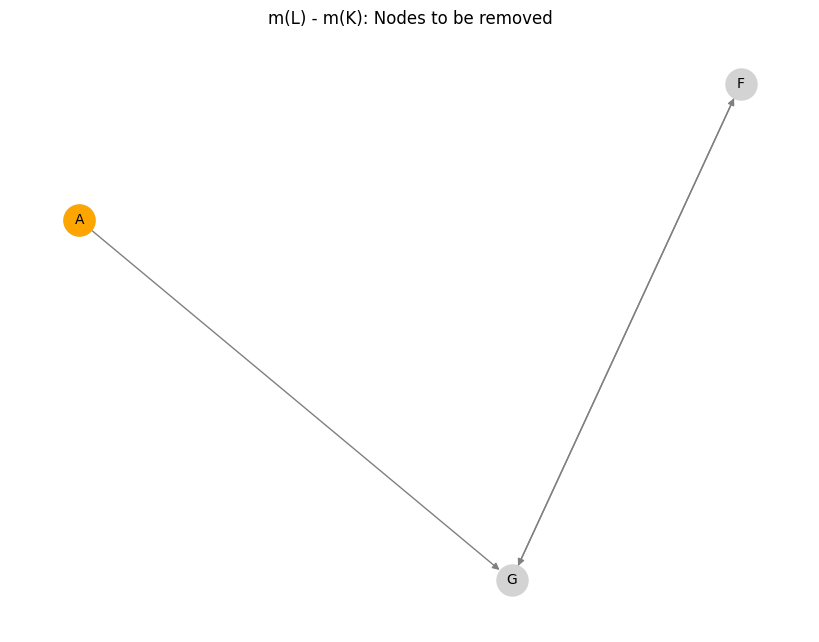

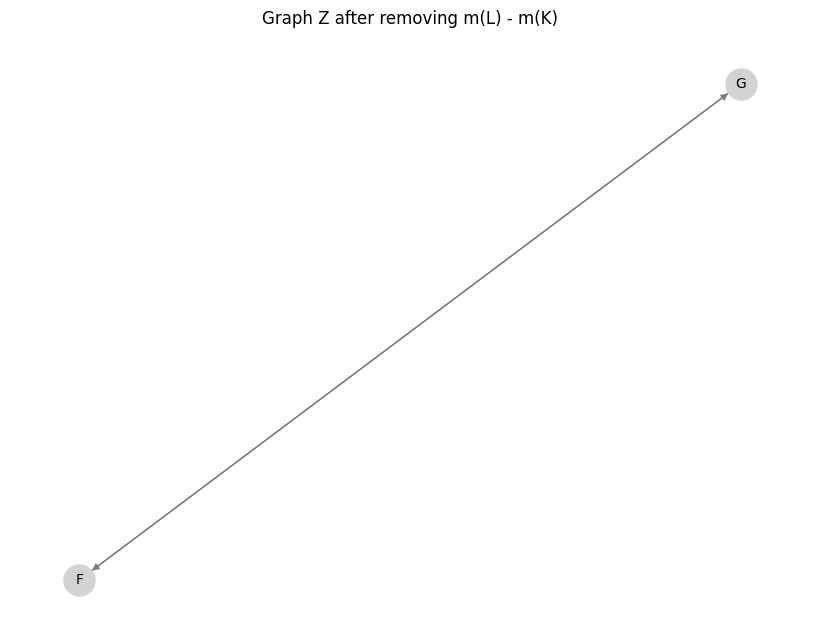

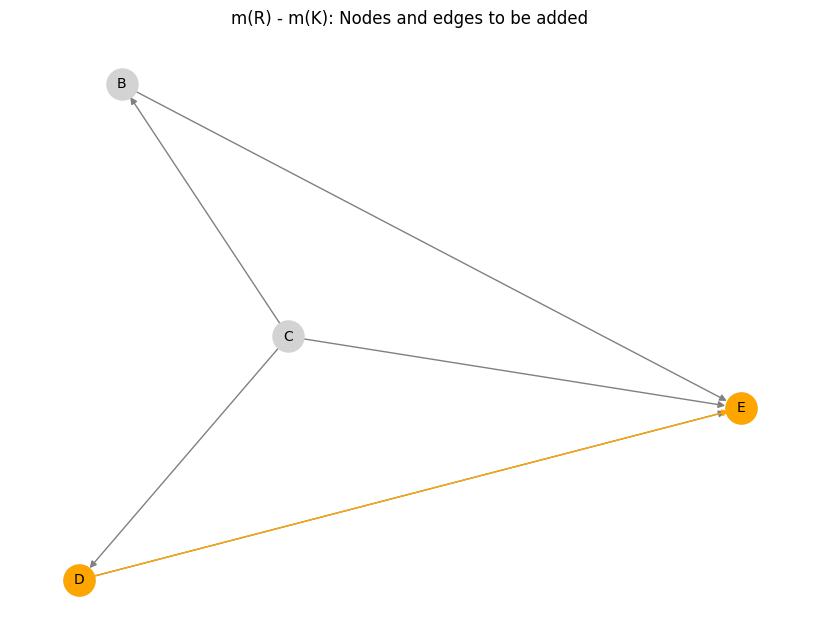

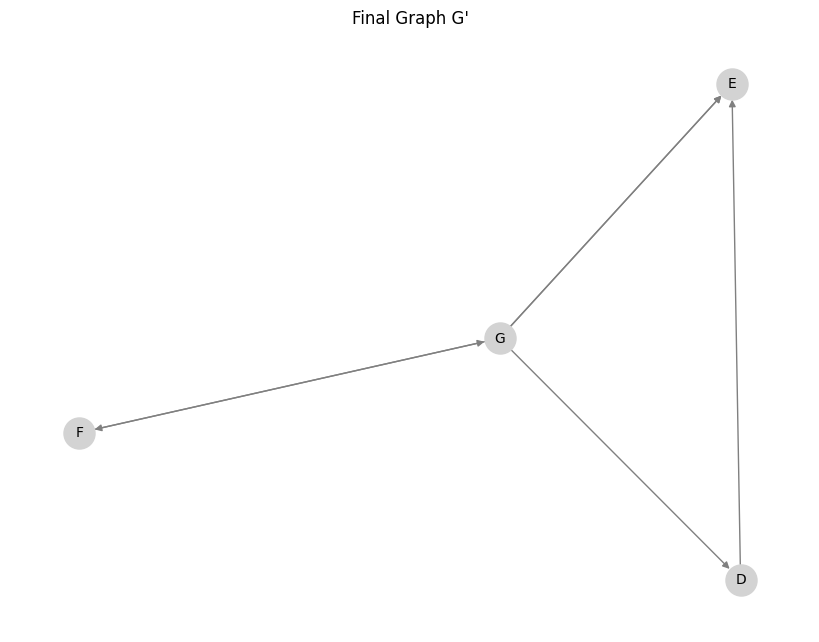

In [7]:
mL_minus_mK = dpo.calculate_mL_minus_mK()
Z = dpo.calculate_Z(mL_minus_mK)
mR_minus_mK = dpo.calculate_mR_minus_mK()
G_prime = dpo.create_G_prime(Z, mR_minus_mK)

In [8]:
print(dpo.G_prime.edges())

[('G', 'F'), ('G', 'D'), ('G', 'E'), ('G', 'E'), ('F', 'G'), ('D', 'E')]
